In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cusersmarildownloadsgermancsv/german.csv


![](https://warehouse-camo.ingress.cmh1.psfhosted.org/072e5a48a57a57f8c239cd3fb717f1c9def7f2bd/68747470733a2f2f6576616c6d6c2d7765622d696d616765732e73332e616d617a6f6e6177732e636f6d2f6576616c6d6c5f686f72697a6f6e74616c2e737667)pypi.org

#EvalML 

https://github.com/alteryx/evalml

EvalML is an AutoML library which builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.

Key Functionality

Automation - Makes machine learning easier. Avoid training and tuning models by hand. Includes data quality checks, cross-validation and more.

Data Checks - Catches and warns of problems with your data and problem setup before modeling.

End-to-end - Constructs and optimizes pipelines that include state-of-the-art preprocessing, feature engineering, feature selection, and a variety of modeling techniques.

Model Understanding - Provides tools to understand and introspect on models, to learn how they'll behave in your problem domain.

Domain-specific - Includes repository of domain-specific objective functions and an interface to define your own.

Follow along by cloning the demo repository: https://github.com/alteryx/open_sourc...

For more information on EvalML, visit our GitHub page at https://github.com/alteryx/evalml and our documentation at https://evalml.alteryx.com

https://github.com/alteryx/evalml

In [2]:
df=pd.read_csv('/kaggle/input/cusersmarildownloadsgermancsv/german.csv',encoding ='ISO-8859-1',sep=";")
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


#Code by Homayoon Khadivi https://www.kaggle.com/homayoonkhadivi/creative-automation-ml-evalml-model-understanding/comments

In [3]:
!pip install evalml

     |████████████████████████████████| 6.2 MB 870 kB/s eta 0:00:01
     |████████████████████████████████| 128 kB 25.2 MB/s eta 0:00:01
     |████████████████████████████████| 148.9 MB 81 kB/s s eta 0:00:01    |██▍                             | 11.0 MB 13.3 MB/s eta 0:00:11     |█████████████████████▍          | 99.5 MB 48.5 MB/s eta 0:00:02
     |████████████████████████████████| 18.0 MB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 51.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 79.9 MB 167 kB/s eta 0:00:011
     |████████████████████████████████| 15.7 MB 28.5 MB/s eta 0:00:01    |▉                               | 389 kB 28.5 MB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 49.0 MB/s eta 0:00:01
  Created wheel for requirements

In [5]:
X = df.drop(columns=['Creditability'])
y = df['Creditability']

In [6]:
import evalml
from evalml.pipelines import BinaryClassificationPipeline

#X,y = evalml.demos.load_breast_cancer()

pipeline = BinaryClassificationPipeline(["Simple Imputer", "Random Forest Classifier"])
pipeline.fit(X,y)

print(pipeline.score(X,y, objectives = ['log loss binary']))

OrderedDict([('Log Loss Binary', 0.4007712418537162)])


#Feature Importance

We can get the importance associated with each feature of the resulting pipeline

In [7]:
pipeline.feature_importance

,feature,importance
0,Account_Balance,0.207154
1,Duration_of_Credit_monthly,0.119788
2,Credit_Amount,0.113379
3,Age_years,0.089190
4,Payment_Status_of_Previous_Credit,0.087124
5,Value_Savings_Stocks,0.061289
6,Purpose,0.046730
7,Length_of_current_employment,0.041319
8,Most_valuable_available_asset,0.038882
9,Instalment_per_cent,0.030083


#Create a bar plot of the feature importances

In [8]:
pipeline.graph_feature_importance()

#Permutation Importance

Compute and plot the permutation importance of the pipeline.

In [9]:
from evalml.model_understanding import calculate_permutation_importance
calculate_permutation_importance(pipeline, X, y, "log loss binary")

,feature,importance
0,Account_Balance,0.096195
1,Duration_of_Credit_monthly,0.047912
2,Payment_Status_of_Previous_Credit,0.034503
3,Credit_Amount,0.033114
4,Age_years,0.031531
5,Value_Savings_Stocks,0.027211
6,Length_of_current_employment,0.018044
7,Purpose,0.017749
8,Most_valuable_available_asset,0.016281
9,Instalment_per_cent,0.012399


In [10]:
from evalml.model_understanding import graph_permutation_importance
graph_permutation_importance(pipeline, X, y, 'log loss binary')

#Partial Dependence Plots

Calculate the one-way partial dependence plots for a feature. Here, I chose Credit amount.

In [12]:
from evalml.model_understanding.graphs import partial_dependence
partial_dependence(pipeline, X, features='Credit_Amount')

,feature_values,partial_dependence,class_label
0,708.410000,0.688760,1
1,794.428687,0.690198,1
2,880.447374,0.690723,1
3,966.466061,0.695401,1
4,1052.484747,0.698128,1
...,...,...,...
95,8880.185253,0.644714,1
96,8966.203939,0.644714,1
97,9052.222626,0.644714,1
98,9138.241313,0.644714,1


In [13]:
from evalml.model_understanding.graphs import graph_partial_dependence
graph_partial_dependence(pipeline, X, features='Credit_Amount')

#Compute the partial dependence for a categorical feature. We don't have categorical, hence I used Demos Load fraud, which has nothing to do with my Creditability Dataset. I saved that snippet to apply when I have Categorical features. 

In [14]:
X_fraud, y_fraud = evalml.demos.load_fraud(100, verbose=False)
X_fraud.ww.init(logical_types={"provider": "Categorical", 'region': "Categorical"})
fraud_pipeline = BinaryClassificationPipeline(["DateTime Featurization Component","One Hot Encoder", "Random Forest Classifier"])
fraud_pipeline.fit(X_fraud, y_fraud)

graph_partial_dependence(fraud_pipeline, X_fraud, features='provider')

#Two-way partial dependence plots are also possible and invoke the same API.

In [16]:
partial_dependence(pipeline, X, features=('Account_Balance', 'Duration_of_Credit_monthly'), grid_resolution=10)

,6.0,10.666666666666668,15.333333333333334,20.0,24.666666666666668,29.333333333333336,34.0,38.66666666666667,43.333333333333336,48.0,class_label
1,0.689251,0.667008,0.644112,0.598346,0.576082,0.558991,0.527391,0.511134,0.502717,0.475198,1
2,0.715445,0.693479,0.672456,0.634481,0.615161,0.594768,0.562059,0.543351,0.534899,0.507593,1
3,0.798103,0.778231,0.768136,0.740560,0.743823,0.725734,0.711680,0.703476,0.697939,0.669184,1
4,0.832282,0.818869,0.812838,0.792775,0.795483,0.781692,0.768582,0.757230,0.751988,0.732821,1


In [17]:
graph_partial_dependence(pipeline, X, features=('Account_Balance', 'Duration_of_Credit_monthly'), grid_resolution=10)

#Confusion Matrix

For binary or multiclass classification, we can view a confusion matrix of the classifier’s predictions. In the DataFrame output of confusion_matrix(), the column header represents the predicted labels while row header represents the actual labels.

In [18]:
from evalml.model_understanding.graphs import confusion_matrix
y_pred = pipeline.predict(X)
confusion_matrix(y, y_pred)

,0,1
0,0.496667,0.503333
1,0.010000,0.990000


In [19]:
from evalml.model_understanding.graphs import graph_confusion_matrix
y_pred = pipeline.predict(X)
graph_confusion_matrix(y, y_pred)

#Predicted Vs Actual Values Graph for Regression Problems

Create a scatterplot comparing predicted vs actual values for regression problems. Specify an outlier_threshold to color values differently if the absolute difference between the actual and predicted values are outside of a given threshold.

In [23]:
from evalml.model_understanding.graphs import graph_prediction_vs_actual
from evalml.pipelines import RegressionPipeline

#X_regress, y_regress = evalml.demos.load_diabetes()
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='regression')

pipeline_regress = RegressionPipeline(['One Hot Encoder', 'Linear Regressor'])
pipeline_regress.fit(X_train, y_train)

y_pred = pipeline_regress.predict(X_test)
graph_prediction_vs_actual(y_test, y_pred, outlier_threshold=50)

In [24]:
pipeline_dt = BinaryClassificationPipeline(['Simple Imputer', 'Decision Tree Classifier'])
pipeline_dt.fit(X, y)

pipeline = BinaryClassificationPipeline(component_graph={'Simple Imputer': ['Simple Imputer'], 'Decision Tree Classifier': ['Decision Tree Classifier', 'Simple Imputer.x']}, parameters={'Simple Imputer':{'impute_strategy': 'most_frequent', 'fill_value': None}, 'Decision Tree Classifier':{'criterion': 'gini', 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}}, random_seed=0)

#Tree Visualization

Visualize the structure of the Decision Tree that was fit to that data, and save it if necessary.

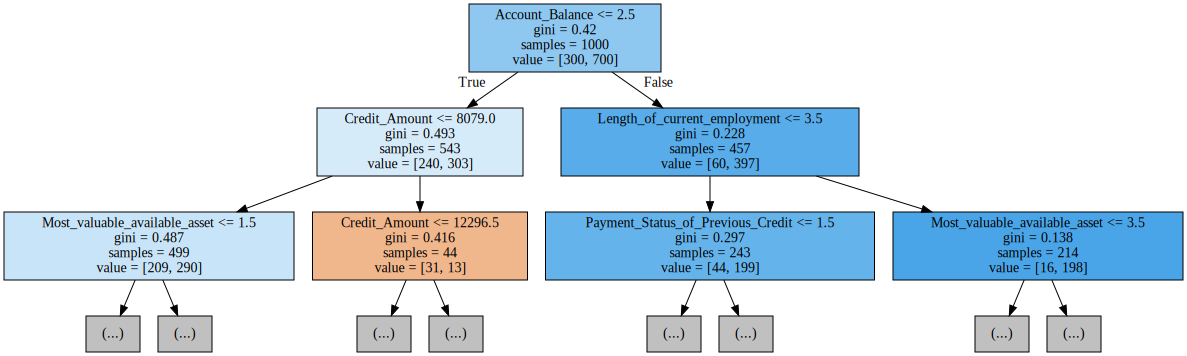

In [25]:
from evalml.model_understanding.graphs import visualize_decision_tree

visualize_decision_tree(pipeline_dt.estimator, max_depth=2, rotate=False, filled=True, filepath=None)

#Why the parenthesis above are empty?

#Explaining Predictions

Explain why the model made certain predictions with the explain_predictions function. This will use the Shapley Additive Explanations (SHAP) algorithm to identify the top features that explain the predicted value.

This function can explain both classification and regression models - all you need to do is provide the pipeline, the input features, and a list of rows corresponding to the indices of the input features you want to explain. The function will return a table that you can print summarizing the top 3 most positive and negative contributing features to the predicted value.

In [26]:
from evalml.model_understanding.prediction_explanations import explain_predictions

table = explain_predictions(pipeline=pipeline, input_features=X, y=None, indices_to_explain=[3],
                           top_k_features=6, include_shap_values=True)
print(table)

Random Forest Classifier w/ Simple Imputer

{'Simple Imputer': {'impute_strategy': 'most_frequent', 'fill_value': None}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}

	1 of 1

		      Feature Name         Feature Value       Contribution to        SHAP Value
		                                                  Prediction                    
		Payment_Status_of_Previo       4.00                   +                  0.06   
		       us_Credit                                                                
		Duration_of_Credit_month       12.00                  +                  0.06   
		           ly                                                                   
		       Age_years               39.00                  +                  0.03   
		Most_valuable_available_       1.00                   +                  0.03   
		         asset                                                                  
		     Foreign_Worker            2.00    

#The interpretation of the table

The interpretation of the table is the same for regression problems - but the SHAP value now corresponds to the change in the estimated value of the dependent variable rather than a change in probability. For multiclass classification problems, a table will be output for each possible class.

Below is an example of how you would explain three predictions with explain_predictions.

In [27]:
from evalml.model_understanding.prediction_explanations import explain_predictions

report = explain_predictions(pipeline=pipeline, input_features=X, y=y, indices_to_explain=[0, 4, 9], include_shap_values=True,
                            output_format='text')
print(report)

Random Forest Classifier w/ Simple Imputer

{'Simple Imputer': {'impute_strategy': 'most_frequent', 'fill_value': None}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}

	1 of 3

		      Feature Name         Feature Value       Contribution to        SHAP Value
		                                                  Prediction                    
		Payment_Status_of_Previo       4.00                   +                  0.06   
		       us_Credit                                                                
		       Age_years               21.00                  -                 -0.05   
		    Account_Balance            1.00                   --                -0.09   


	2 of 3

		      Feature Name         Feature Value       Contribution to        SHAP Value
		                                                  Prediction                    
		Payment_Status_of_Previo       4.00                   +                  0.06   
		       us_Credit            

#Explaining Best and Worst Predictions

When debugging machine learning models, it is often useful to analyze the best and worst predictions the model made. The explain_predictions_best_worst function can help us with this.

This function will display the output of explain_predictions for the best 2 and worst 2 predictions. By default, the best and worst predictions are determined by the absolute error for regression problems and cross entropy for classification problems.

We can specify our own ranking function by passing in a function to the metric parameter. This function will be called on y_true and y_pred. By convention, lower scores are better.

At the top of each table, we can see the predicted probabilities, target value, error, and row index for that prediction. For a regression problem, we would see the predicted value instead of predicted probabilities.

In [28]:
from evalml.model_understanding.prediction_explanations import explain_predictions_best_worst

report = explain_predictions_best_worst(pipeline=pipeline, input_features=X, y_true=y,
                                        include_shap_values=True, top_k_features=6, num_to_explain=2)

print(report)

Random Forest Classifier w/ Simple Imputer

{'Simple Imputer': {'impute_strategy': 'most_frequent', 'fill_value': None}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}

	Best 1 of 2

		Predicted Probabilities: [0: 0.036, 1: 0.964]
		Predicted Value: 1
		Target Value: 1
		Cross Entropy: 0.037
		Index ID: 53

		      Feature Name         Feature Value       Contribution to        SHAP Value
		                                                  Prediction                    
		    Account_Balance            4.00                   ++                 0.08   
		Payment_Status_of_Previo       4.00                   +                  0.03   
		       us_Credit                                                                
		  Value_Savings_Stocks         5.00                   +                  0.03   
		       Age_years               49.00                  +                  0.02   
		Duration_of_Credit_month       12.00                  +                  0

#Hinge Loss

Use a custom metric (hinge loss) for selecting the best and worst predictions. See this example:

In [29]:
import numpy as np

def hinge_loss(y_true, y_pred_proba):

    probabilities = np.clip(y_pred_proba.iloc[:, 1], 0.001, 0.999)
    y_true[y_true == 0] = -1

    return np.clip(1 - y_true * np.log(probabilities / (1 - probabilities)), a_min=0, a_max=None)

report = explain_predictions_best_worst(pipeline=pipeline, input_features=X, y_true=y,
                                        include_shap_values=True, num_to_explain=5, metric=hinge_loss)

print(report)

Random Forest Classifier w/ Simple Imputer

{'Simple Imputer': {'impute_strategy': 'most_frequent', 'fill_value': None}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}

	Best 1 of 5

		Predicted Probabilities: [0: 0.248, 1: 0.752]
		Predicted Value: 1
		Target Value: 1
		hinge_loss: 0.0
		Index ID: 499

		      Feature Name         Feature Value       Contribution to        SHAP Value
		                                                  Prediction                    
		  Value_Savings_Stocks         3.00                   +                  0.04   
		Duration_of_Credit_month       12.00                  +                  0.03   
		           ly                                                                   
		    Account_Balance            1.00                   --                -0.10   


	Best 2 of 5

		Predicted Probabilities: [0: 0.159, 1: 0.841]
		Predicted Value: 1
		Target Value: 1
		hinge_loss: 0.0
		Index ID: 669

		      Feature Name     

#Single prediction as a dataframe

In [31]:
single_prediction_report = explain_predictions(pipeline=pipeline, input_features=X, indices_to_explain=[3],
                                              y=y, top_k_features=6, include_shap_values=True,
                                              output_format="dataframe")
single_prediction_report

,feature_names,feature_values,qualitative_explanation,quantitative_explanation,class_name,prediction_number
0,Payment_Status_of_Previous_Credit,4,+,0.062365,1,0
1,Duration_of_Credit_monthly,12,+,0.055362,1,0
2,Age_years,39,+,0.032061,1,0
3,Most_valuable_available_asset,1,+,0.031255,1,0
4,Foreign_Worker,2,+,0.021290,1,0
5,Account_Balance,1,--,-0.074922,1,0


#Best and worst predictions as a dataframe

In [33]:
report = explain_predictions_best_worst(pipeline=pipeline, input_features=X, y_true=y,
                                        num_to_explain=1, top_k_features=6,
                                        include_shap_values=True, output_format="dataframe")
report

,feature_names,feature_values,qualitative_explanation,quantitative_explanation,class_name,label_0_probability,label_1_probability,predicted_value,target_value,error_name,error_value,index_id,rank,prefix
0,Account_Balance,4,++,0.076726,1,0.036,0.964,1,1,Cross Entropy,0.037030,53,1,best
1,Payment_Status_of_Previous_Credit,4,+,0.034619,1,0.036,0.964,1,1,Cross Entropy,0.037030,53,1,best
2,Value_Savings_Stocks,5,+,0.033250,1,0.036,0.964,1,1,Cross Entropy,0.037030,53,1,best
3,Age_years,49,+,0.022457,1,0.036,0.964,1,1,Cross Entropy,0.037030,53,1,best
4,Duration_of_Credit_monthly,12,+,0.022362,1,0.036,0.964,1,1,Cross Entropy,0.037030,53,1,best
5,Length_of_current_employment,5,+,0.018068,1,0.036,0.964,1,1,Cross Entropy,0.037030,53,1,best
6,Account_Balance,4,+++,0.111635,1,0.141,0.859,1,0,Cross Entropy,1.962517,582,1,worst
7,Length_of_current_employment,5,+,0.018346,1,0.141,0.859,1,0,Cross Entropy,1.962517,582,1,worst
8,Credit_Amount,3621,+,0.014035,1,0.141,0.859,1,0,Cross Entropy,1.962517,582,1,worst
9,Purpose,3,+,0.011111,1,0.141,0.859,1,0,Cross Entropy,1.962517,582,1,worst


#Code by Homayoon Khadivi https://www.kaggle.com/homayoonkhadivi/creative-automation-ml-evalml-model-understanding/comments